In [1]:
import matplotlib 
# matplotlib.use('Agg') 
 
import PID 
import time 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
# from scipy.interpolate import spline 


def convert_error_to_time_exp(error):
    mul = 2.851
    e = 4.3523
    return (mul*math.e**(e*error))

def convert_error_to_time_exp_decreasing(error):
    mul = 13.5379
    e = -3.7221
    return (mul*math.e**(e*error))

def convert_error_to_time_lin(error):
    mul = 54.091
    ad = 22.136
    return (mul*error+ad)

def convert_curr_consumption_to_voltage_drop(time) :
    Iactive = 3.3
    Isleep = 0.00235
    v = (Iactive+time*Isleep)/500
    return v

def convert_error_to_time_const(error):
    return (20)

def convert_error_to_time_const_60(error):
    return (60)

P = 1
I = 0.0001 
D = 0.0001 
pid = PID.PID(P, I, D) 
 
pid.SetPoint = 4
pid.setSampleTime(0.1) 
 
def simulate_pid(time_function, current_voltage, pid):
    feedback_list = [] 
    time_list = [] 
    setpoint_list = [] 
    error_list = []
    period_list = []
    print("simulating....") 
    i=0
    a = time.time()
    prev_period=0
    while(1):
        pid.update(current_voltage) 
        output = pid.output 
        period = time_function(output)
        vd = convert_curr_consumption_to_voltage_drop(period)
        print("Vd: ",vd,"Output: ",output, "Feedback: ", current_voltage, "Feedback + Output: ", current_voltage+output, "Period: ", period)
        if(current_voltage<3.3):
            break
        current_voltage-=vd
        # time.sleep(period/100) 
        time.sleep(0.2)
        feedback_list.append(current_voltage) 
        setpoint_list.append(pid.SetPoint) 
        time_list.append(period) 
        error_list.append(output)
        period_list.append(prev_period+period)
        prev_period = period_list[-1]
        i+=1
    b = time.time()-a

    return feedback_list, setpoint_list, time_list, error_list, period_list, b

In [2]:
feedback_lin_list, setpoint_list, time_lin_list, error_lin_list, period_lin_list, time_ran_lin =simulate_pid(convert_error_to_time_lin, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 

feedback_const_list, setpoint_list, time_const_list, error_const_list, period_const_list, time_ran_const = simulate_pid(convert_error_to_time_const, 4.4,pid)  
pid.clear() 
pid.SetPoint = 4
pid.setSampleTime(0.1) 
feedback_const_list_60, setpoint_list, time_const_list_60, error_const_list_60, period_const_list_60, time_ran_const_60 = simulate_pid(convert_error_to_time_const_60, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 
feedback_exp_list, setpoint_list, time_exp_list, error_exp_list, period_exp_list, time_ran_exp = simulate_pid(convert_error_to_time_exp, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 

feedback_exp_dec_list, setpoint_list, time_exp_dec_list, error_exp_dec_list, period_exp_dec_list, time_ran_exp_dec =simulate_pid(convert_error_to_time_exp_decreasing, 4.4,pid)   
pid.SetPoint = 4
pid.setSampleTime(0.1) 


simulating....
Vd:  0.006602320918866719 Output:  -0.4001069951593846 Feedback:  4.4 Feedback + Output:  3.9998930048406156 Period:  0.4938125248337286
Vd:  0.006604002814030295 Output:  -0.393491291349073 Feedback:  4.393397679081134 Feedback + Output:  3.999906387732061 Period:  0.8516625596372904
Vd:  0.006605679763195274 Output:  -0.3868950425336241 Feedback:  4.386793676267104 Feedback + Output:  3.9998986337334794 Period:  1.2084602543137386
Vd:  0.006607357173290937 Output:  -0.38029698065577805 Feedback:  4.380187996503908 Feedback + Output:  3.9998910158481302 Period:  1.5653560193483074
Vd:  0.006609035043977247 Output:  -0.37369710705305553 Feedback:  4.373580639330617 Feedback + Output:  3.9998835322775617 Period:  1.922349782393173
Vd:  0.006610713373976638 Output:  -0.36709542675075096 Feedback:  4.36697160428664 Feedback + Output:  3.9998761775358886 Period:  2.279441271625128
Vd:  0.0066123921642826135 Output:  -0.36049193584092715 Feedback:  4.360360890912663 Feedback 

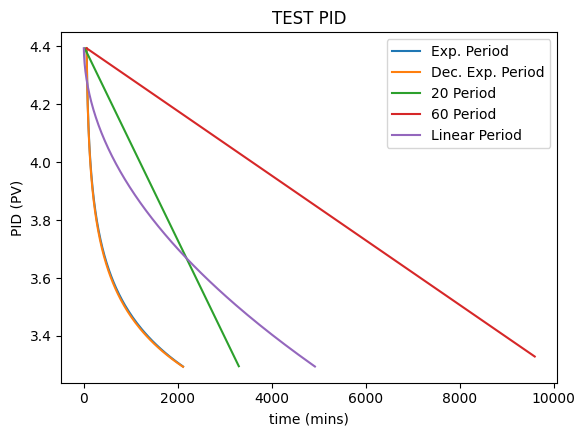

In [3]:
fig1 = plt.gcf() 
fig1.subplots_adjust(bottom=0.15) 
 
plt.plot(period_exp_list, feedback_exp_list,label='Exp. Period') 
plt.plot(period_exp_list[:len(feedback_exp_dec_list)], feedback_exp_dec_list,label='Dec. Exp. Period') 
plt.plot(period_const_list, feedback_const_list[:len(period_const_list)],label='20 Period') 
plt.plot(period_const_list_60, feedback_const_list[:len(period_const_list_60)],label='60 Period') 
plt.plot(period_lin_list, feedback_lin_list[:len(period_lin_list)],label='Linear Period') 
 
plt.xlabel('time (mins)') 
plt.ylabel('PID (PV)') 
plt.title('TEST PID') 
plt.legend()
 

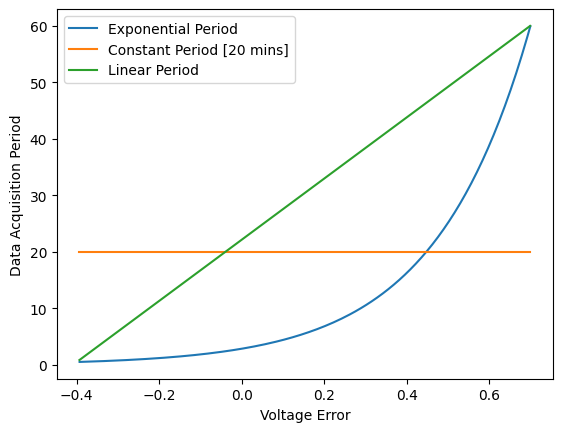

In [18]:
# fig= plt.gcf()
# fig.subplots_adjust(bottom=0.15) 
plt.plot(error_exp_list[1:],time_exp_list[1:], label='Exponential Period')
# plt.plot(feedback_exp_dec_list[1:],time_exp_dec_list[1:], label='Exp. Dec Period')
plt.plot(error_const_list[1:],time_const_list[1:], label='Constant Period [20 mins]')
# plt.plot(feedback_const_list_60[1:],time_const_list_60[1:],label='Const 60 Period')
plt.plot(error_lin_list[1:],time_lin_list[1:], label='Linear Period')

plt.xlabel("Voltage Error")
plt.ylabel("Data Acquisition Period")
plt.legend()

In [6]:
print(time_lin_list[0], time_lin_list[0], error_lin_list[0])
print(len(feedback_lin_list), len(feedback_const_list))
sum_value=sum(time_lin_list)
print("Average: ",sum_value/len(time_lin_list))

22.136 22.136 0.0
164 165
Average:  30.143658884428515


# Test Case II:

In [3]:
voltages = [4.4,
4.41,
4.4,
4.41,
4.4,
4.4,
4.4,
4.4,
4.41,
4.41,
4.28,
4.17,
4.16,
4.17,
4.16,
4.16,
4.16,
4.16,
4.16,
4.16,
4.16,
4.15,
4.16,
4.16,
4.15,
4.15,
4.14,
4.15,
4.14,
4.14,
4.14,
4.14,
4.14,
4.14,
4.14,
4.13,
4.14,
4.14,
4.13,
4.13,
4.13,
4.13,
4.13,
4.13,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.25,
4.12,
4.12,
4.12,
4.13,
4.12,
4.12,
4.12,
4.28,
4.28,
4.28,
4.28,
4.28,
4.28,
4.27,
4.28,
4.4,
4.4,
4.41,
4.41,
4.41,
4.4,
4.4,
4.28,
4.4,
4.28,
4.17,
4.17,
4.16,
4.17,
4.16,
4.16,
4.16,
4.16,
4.16,
4.16,
4.16,
4.16,
4.16,
4.15,
4.15,
4.15,
4.15,
4.15,
4.14,
4.14,
4.14,
4.14,
4.14,
4.14,
4.13,
4.13,
4.13,
4.13,
4.14,
4.13,
4.13,
4.13,
4.12,
4.13,
4.12,
4.13,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.12,
4.13,
4.12,
4.12
]

In [16]:
import matplotlib 
# matplotlib.use('Agg') 
 
import PID 
import time 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
# from scipy.interpolate import spline 


def convert_error_to_time_exp(error):
    mul = 2.851
    e = 4.3523
    return (mul*math.e**(e*error))

def convert_error_to_time_exp_decreasing(error):
    mul = 13.5379
    e = -3.7221
    return (mul*math.e**(e*error))

def convert_error_to_time_lin(error):
    mul = 54.091
    ad = 22.136
    return (mul*error+ad)

def convert_curr_consumption_to_voltage_drop(time) :
    Iactive = 3.3
    Isleep = .00235
    v = (Iactive+time*Isleep)/500
    return v

def convert_error_to_time_const(error):
    return (20)

def convert_error_to_time_const_60(error):
    return (60)

def get_voltage():
    for i in voltages:
        yield i
P = 1
I = 0.0001 
D = 0.0001 
pid = PID.PID(P, I, D) 
 
pid.SetPoint = 4
pid.setSampleTime(0.1) 
 
def simulate_pid(time_function, current_voltage, pid):
    feedback_list = [] 
    time_list = [] 
    setpoint_list = [] 
    error_list = []
    period_list = []
    print("simulating....") 
    i=0
    a = time.time()
    vd=0
    prev_period=0
    for current_voltage in get_voltage():
        current_voltage-=0.5
        pid.update(current_voltage) 
        output = pid.output 
        period = time_function(output)
        vd = convert_curr_consumption_to_voltage_drop(period)
        print("Vd: ",vd,"Output: ",output, "Feedback: ", current_voltage, "Feedback + Output: ", current_voltage+output, "Period: ", period)
        if(current_voltage<3.3):
            break
        # time.sleep(period/100) 
        time.sleep(0.2)
        feedback_list.append(current_voltage) 
        setpoint_list.append(pid.SetPoint) 
        time_list.append(period) 
        error_list.append(output)
        period_list.append(prev_period+period)
        prev_period = period_list[-1]
        i+=1
    b = time.time()-a

    return feedback_list, setpoint_list, time_list, error_list, period_list, b

In [17]:
feedback_lin_list, setpoint_list, time_lin_list, error_lin_list, period_lin_list, time_ran_lin =simulate_pid(convert_error_to_time_lin, 4.4,pid)   
pid.clear()
pid.SetPoint = 4
pid.setSampleTime(0.1) 

feedback_const_list, setpoint_list, time_const_list, error_const_list, period_const_list, time_ran_const = simulate_pid(convert_error_to_time_const, 4.4,pid)  

simulating....
Vd:  0.006729498338292232 Output:  0.10014305401115776 Feedback:  3.9000000000000004 Feedback + Output:  4.000143054011158 Period:  27.552837934517534
Vd:  0.0067269550718629416 Output:  0.09013916210917312 Feedback:  3.91 Feedback + Output:  4.000139162109173 Period:  27.011717417647283
Vd:  0.006729500395199127 Output:  0.10015114481674384 Feedback:  3.9000000000000004 Feedback + Output:  4.000151144816744 Period:  27.55327557428249
Vd:  0.006726956041371978 Output:  0.09014297565520595 Feedback:  3.91 Feedback + Output:  4.000142975655206 Period:  27.011923696165745
Vd:  0.0067295013641801085 Output:  0.10015495628567891 Feedback:  3.9000000000000004 Feedback + Output:  4.000154956285679 Period:  27.553481740448657
Vd:  0.006729500606301597 Output:  0.10015197518444026 Feedback:  3.9000000000000004 Feedback + Output:  4.0001519751844405 Period:  27.55332048970156
Vd:  0.006729501116381536 Output:  0.10015398157453502 Feedback:  3.9000000000000004 Feedback + Output:  4

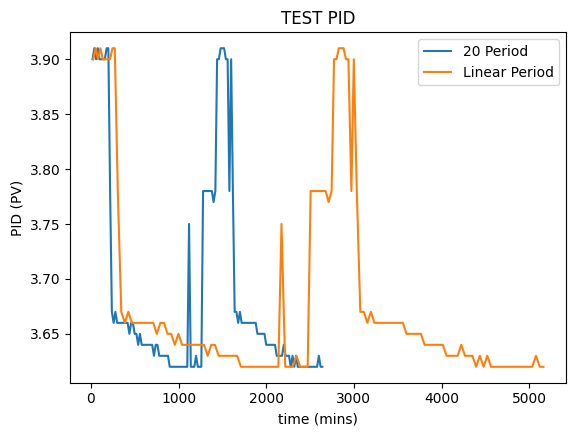

In [18]:
fig1 = plt.gcf() 
fig1.subplots_adjust(bottom=0.15) 
 
plt.plot(period_const_list, feedback_const_list[:len(period_const_list)],label='20 Period') 
plt.plot(period_lin_list, feedback_lin_list[:len(period_lin_list)],label='Linear Period') 
 
plt.xlabel('time (mins)') 
plt.ylabel('PID (PV)') 
plt.title('TEST PID') 
plt.legend()

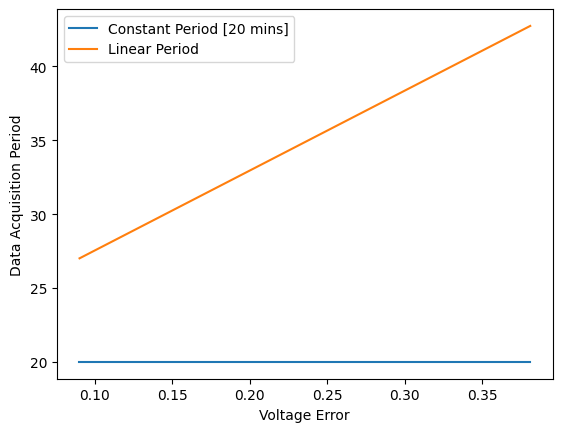

In [19]:
# fig= plt.gcf()
# fig.subplots_adjust(bottom=0.15) 
# plt.plot(feedback_exp_dec_list[1:],time_exp_dec_list[1:], label='Exp. Dec Period')
plt.plot(error_const_list[1:],time_const_list[1:], label='Constant Period [20 mins]')
# plt.plot(feedback_const_list_60[1:],time_const_list_60[1:],label='Const 60 Period')
plt.plot(error_lin_list[1:],time_lin_list[1:], label='Linear Period')

plt.xlabel("Voltage Error")
plt.ylabel("Data Acquisition Period")
plt.legend()

In [12]:
sum_value=sum(time_lin_list)
print("Average: ",sum_value/len(time_lin_list))

132 132
Average:  39.095290171745155


In [8]:
import matplotlib 
import PID 
import time 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

def convert_error_to_time_exp(error):
    mul = 2.851
    e = 4.3523
    return (mul*math.e**(e*error))

def convert_error_to_time_exp_decreasing(error):
    mul = 13.5379
    e = -3.7221
    return (mul*math.e**(e*error))

def convert_error_to_time_lin(error):
    mul = 54.091
    ad = 22.136
    return (mul*error+ad)


def convert_error_to_time_const(error):
    return (20)

def convert_error_to_time_const_60(error):
    return (60)


P = 1
I = 0.0001 
D = 0.0001 
pid = PID.PID(P, I, D) 
 
pid.SetPoint = 4
pid.setSampleTime(0.1) 
 
def simulate_pid(time_function, current_voltage, pid):
    feedback_list = [] 
    time_list = [] 
    setpoint_list = [] 
    error_list = []
    period_list = []
    print("simulating....") 
    i=0
    a = time.time()
    vd=0
    prev_period=0
    while(i<300):
        pid.update(current_voltage) 
        output = pid.output 
        period = time_function(output)
        current_voltage+=output

        print("Vd: ",vd,"Output: ",output, "Feedback: ", current_voltage, "Feedback + Output: ", current_voltage+output, "Period: ", period)
        if(current_voltage<3.3):
            break
        # time.sleep(period/100) 
        time.sleep(0.2)
        feedback_list.append(current_voltage) 
        setpoint_list.append(pid.SetPoint) 
        time_list.append(period) 
        error_list.append(output)
        period_list.append(prev_period+period)
        prev_period = period_list[-1]
        i+=1
    b = time.time()-a

    return feedback_list, setpoint_list, time_list, error_list, period_list, b

In [9]:
feedback_lin_list, setpoint_list, time_lin_list, error_lin_list, period_lin_list, time_ran_lin =simulate_pid(convert_error_to_time_lin, 3.3,pid)   
pid.clear()
pid.SetPoint = 4
pid.setSampleTime(0.1) 

feedback_const_list, setpoint_list, time_const_list, error_const_list, period_const_list, time_ran_const = simulate_pid(convert_error_to_time_const, 3.3,pid) 

simulating....
Vd:  0 Output:  0.7001582197230677 Feedback:  4.000158219723067 Feedback + Output:  4.7003164394461345 Period:  60.00825826304046
Vd:  0 Output:  -0.00046547607837413936 Feedback:  3.999692743644693 Feedback + Output:  3.9992272675663187 Period:  22.110821933444665
Vd:  0 Output:  0.0003497452177626682 Feedback:  4.000042488862456 Feedback + Output:  4.000392234080219 Period:  22.154918068574
Vd:  0 Output:  -4.0697912865536016e-07 Feedback:  4.000042081883327 Feedback + Output:  4.000041674904199 Period:  22.13597798609195
Vd:  0 Output:  1.7340013329916996e-07 Feedback:  4.000042255283461 Feedback + Output:  4.000042428683594 Period:  22.13600937938661
Vd:  0 Output:  -1.1363306182086083e-09 Feedback:  4.00004225414713 Feedback + Output:  4.000042253010799 Period:  22.13599993853474
Vd:  0 Output:  -7.597417945879923e-10 Feedback:  4.000042253387388 Feedback + Output:  4.0000422526276465 Period:  22.135999958904804
Vd:  0 Output:  -8.473344931500776e-10 Feedback:  4.00

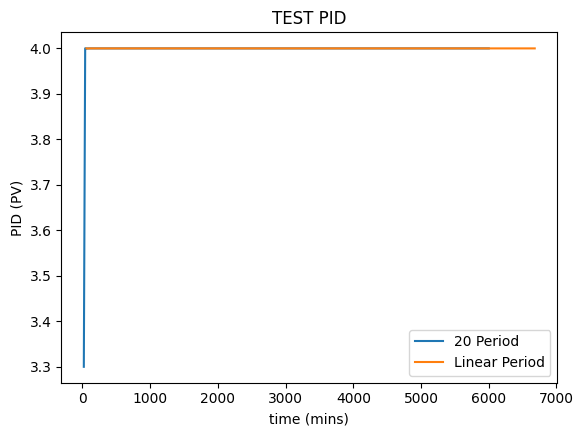

In [10]:
fig1 = plt.gcf() 
fig1.subplots_adjust(bottom=0.15) 
 
plt.plot(period_const_list, feedback_const_list[:len(period_const_list)],label='20 Period') 
plt.plot(period_lin_list, feedback_lin_list[:len(period_lin_list)],label='Linear Period') 
 
plt.xlabel('time (mins)') 
plt.ylabel('PID (PV)') 
plt.title('TEST PID') 
plt.legend()